# **Exploracion de datos de titanic**

### Limpieza de datos
Se va a remover PassengerId, Name, Ticket, Cabin <br/>
Se van a remover los records de Age que estan vacios.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [4]:
%cd "/content/gdrive/MyDrive/AI_avanzada/reto_titanic/dababase"
!ls


/content/gdrive/MyDrive/AI_avanzada/reto_titanic/dababase
gender_submission.csv  test.csv  train.csv


In [5]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
validation_df = pd.read_csv("gender_submission.csv")

In [6]:
test_df['Survived'] = validation_df['Survived'].copy()
passengerId = test_df['PassengerId'].copy()

In [7]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
print("Train Data Null Summary")
print(train_df.isnull().sum())
print("\nTest Data Null Summary")
print(test_df.isnull().sum())

Train Data Null Summary
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test Data Null Summary
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


In [10]:
train_df['Age_averaged'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_averaged
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,21.5
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0


In [11]:
train_df = train_df.drop(['Ticket', 'PassengerId', 'Age'], axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Fare          891 non-null    float64
 7   Cabin         204 non-null    object 
 8   Embarked      889 non-null    object 
 9   Age_averaged  891 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [12]:
def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substring in big_string:
            return substring
    return "None"

In [13]:
title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev', 'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess', 'Don', 'Jonkheer']
train_df['Title']=train_df['Name'].map(lambda x: substrings_in_string(x, title_list))

In [14]:
train_df

,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_averaged,Title
0,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,NaN,S,22.0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C85,C,38.0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,NaN,S,26.0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,C123,S,35.0,Mrs
4,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,NaN,S,35.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,0,0,13.0000,NaN,S,27.0,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,0,0,30.0000,B42,S,19.0,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,23.4500,NaN,S,21.5,Miss
889,1,1,"Behr, Mr. Karl Howell",male,0,0,30.0000,C148,C,26.0,Mr


In [15]:
train_df = train_df.drop(['Name', 'Cabin'], axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    object 
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   Embarked      889 non-null    object 
 7   Age_averaged  891 non-null    float64
 8   Title         891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [16]:
train_df = train_df.dropna(axis=0, subset=['Embarked'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      889 non-null    int64  
 1   Pclass        889 non-null    int64  
 2   Sex           889 non-null    object 
 3   SibSp         889 non-null    int64  
 4   Parch         889 non-null    int64  
 5   Fare          889 non-null    float64
 6   Embarked      889 non-null    object 
 7   Age_averaged  889 non-null    float64
 8   Title         889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


In [22]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_averaged,Title
0,0,3,male,1,0,7.2500,S,22.0,Mr
1,1,1,female,1,0,71.2833,C,38.0,Mrs
2,1,3,female,0,0,7.9250,S,26.0,Miss
3,1,1,female,1,0,53.1000,S,35.0,Mrs
4,0,3,male,0,0,8.0500,S,35.0,Mr


SEX:

0 => Male

1 => Female

In [25]:
train_df["Sex"] = pd.factorize(train_df["Sex"])[0]
train_df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_averaged,Title
0,0,3,0,1,0,7.2500,S,22.0,Mr
1,1,1,1,1,0,71.2833,C,38.0,Mrs
2,1,3,1,0,0,7.9250,S,26.0,Miss
3,1,1,1,1,0,53.1000,S,35.0,Mrs
4,0,3,0,0,0,8.0500,S,35.0,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,13.0000,S,27.0,Rev
887,1,1,1,0,0,30.0000,S,19.0,Miss
888,0,3,1,1,2,23.4500,S,21.5,Miss
889,1,1,0,0,0,30.0000,C,26.0,Mr


EMBARKED

0 => S

1 => C

2 => Q

In [28]:
train_df["Embarked"] = pd.factorize(train_df["Embarked"])[0]
train_df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_averaged,Title
0,0,3,0,1,0,7.2500,0,22.0,Mr
1,1,1,1,1,0,71.2833,1,38.0,Mrs
2,1,3,1,0,0,7.9250,0,26.0,Miss
3,1,1,1,1,0,53.1000,0,35.0,Mrs
4,0,3,0,0,0,8.0500,0,35.0,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,13.0000,0,27.0,Rev
887,1,1,1,0,0,30.0000,0,19.0,Miss
888,0,3,1,1,2,23.4500,0,21.5,Miss
889,1,1,0,0,0,30.0000,1,26.0,Mr


TITLE:

0 => Mr

1 => Mrs

2 => Miss

3 => Master

4 => Don

5 => Rev

6 => Dr

7 => Mme

8 => Ms

9 => Major

10 => Mlle

11 => Col

12 => Capt

13 => Countess

14 => Jonkheer

In [35]:
train_df["Title"] = pd.factorize(train_df["Title"])[0]
train_df



,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_averaged,Title
0,0,3,0,1,0,7.2500,0,22.0,0
1,1,1,1,1,0,71.2833,1,38.0,1
2,1,3,1,0,0,7.9250,0,26.0,2
3,1,1,1,1,0,53.1000,0,35.0,1
4,0,3,0,0,0,8.0500,0,35.0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,13.0000,0,27.0,5
887,1,1,1,0,0,30.0000,0,19.0,2
888,0,3,1,1,2,23.4500,0,21.5,2
889,1,1,0,0,0,30.0000,1,26.0,0


Nos aseguramos que todas las columnas contengan valores numericos

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      889 non-null    int64  
 1   Pclass        889 non-null    int64  
 2   Sex           889 non-null    int64  
 3   SibSp         889 non-null    int64  
 4   Parch         889 non-null    int64  
 5   Fare          889 non-null    float64
 6   Embarked      889 non-null    int64  
 7   Age_averaged  889 non-null    float64
 8   Title         889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 101.7 KB


#Histogramas y graficas

Variables:

Categoricas:

*   Survived
*   Pclass
*   Sex
*   Embarked
*   Title

Discretas:

*   SibSp
*   Parch

Continuas:

*   Fare
*   Age_averaged (Por las edades vacias que se llenaron con le promedio de la clase y el sexo)



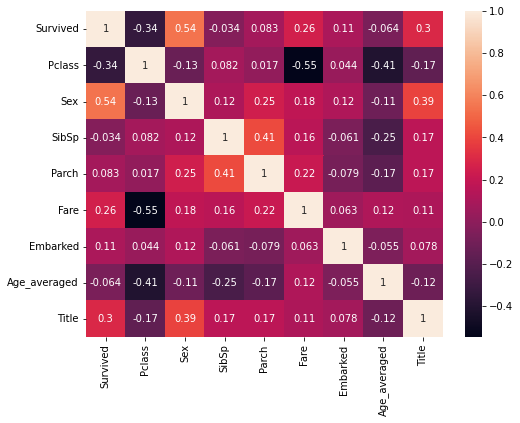

In [37]:
corr_df = train_df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

Entre los datos que tienen más coorelación con Survived estan: Pclass, Sex, Fare y Title

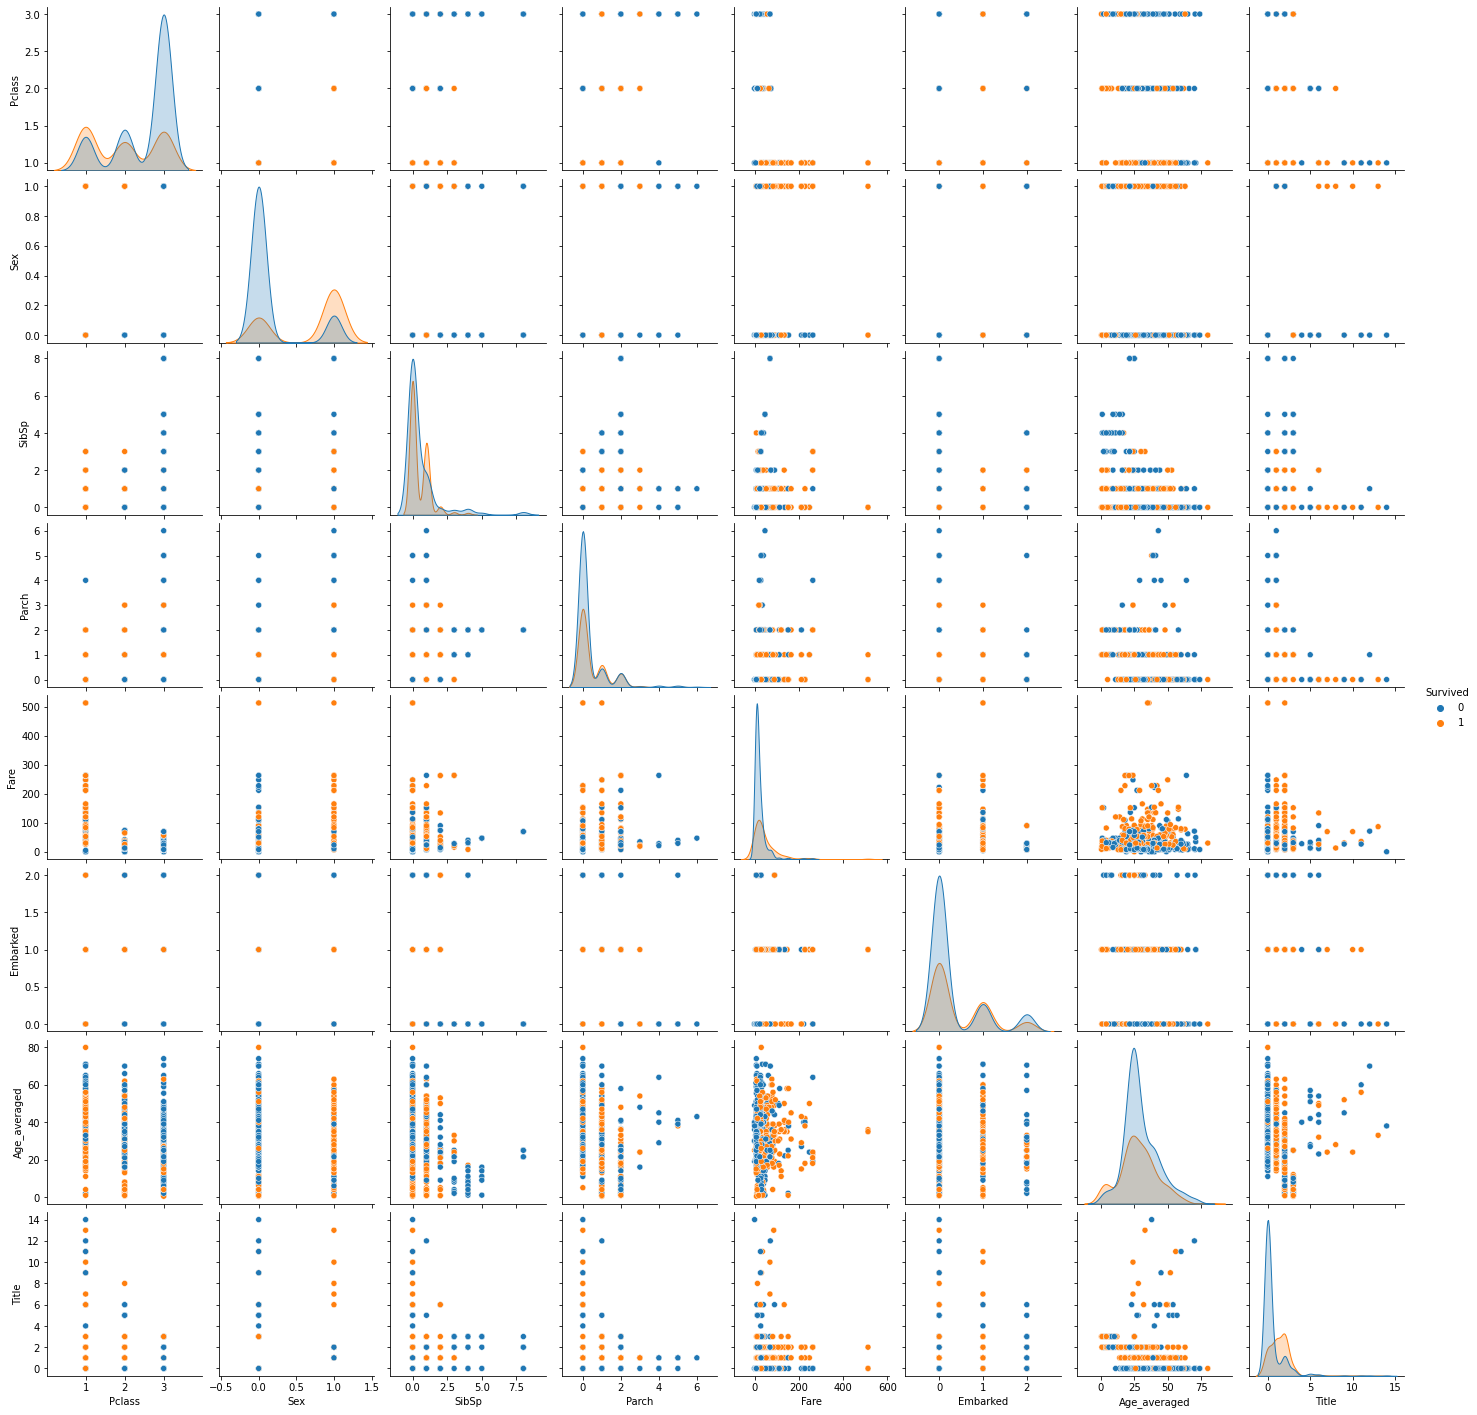

In [38]:
sns.pairplot(train_df, hue="Survived")

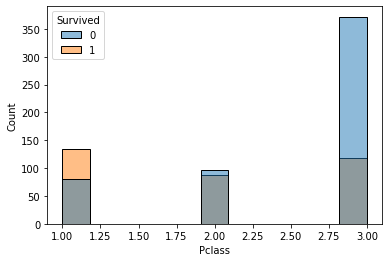

In [55]:
sns.histplot(data=train_df, x="Pclass", hue="Survived" )

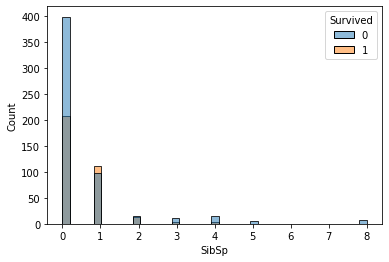

In [57]:
sns.histplot(data=train_df, x="SibSp", hue="Survived" )

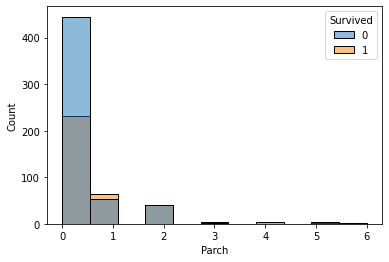

In [58]:
sns.histplot(data=train_df, x="Parch", hue="Survived" )

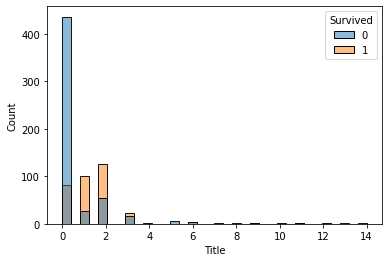

In [69]:
sns.histplot(data=train_df, x="Title", hue="Survived" )

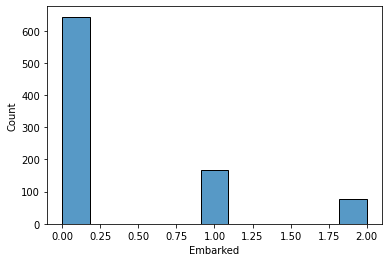

In [59]:
sns.histplot(data=train_df, x="Embarked")

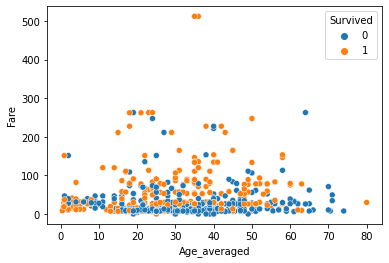

In [61]:
sns.scatterplot(data=train_df, x="Age_averaged", y="Fare", hue="Survived")

### Boxplots

In [63]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Age_averaged', 'Title'],
      dtype='object')

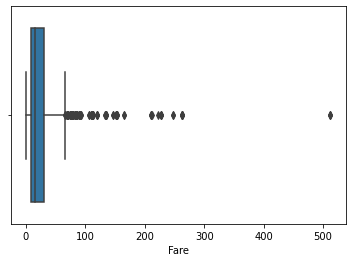

In [65]:
sns.boxplot(data=train_df, x="Fare")

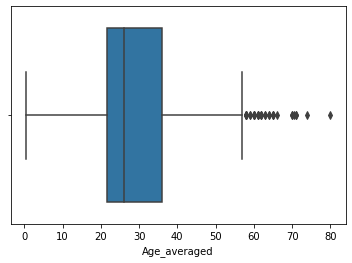

In [66]:
sns.boxplot(data=train_df, x="Age_averaged")

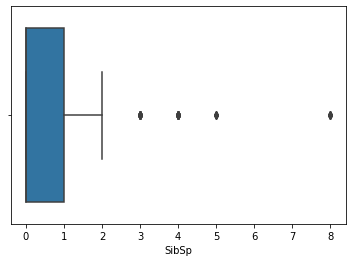

In [67]:
sns.boxplot(data=train_df, x="SibSp")

# Limpieza de datos

In [71]:
train_df = train_df[(train_df["Age_averaged"] < 80) & (train_df["Fare"] < 300)]
train_df.info()
#Solo se eliminaron 4 registros

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      885 non-null    int64  
 1   Pclass        885 non-null    int64  
 2   Sex           885 non-null    int64  
 3   SibSp         885 non-null    int64  
 4   Parch         885 non-null    int64  
 5   Fare          885 non-null    float64
 6   Embarked      885 non-null    int64  
 7   Age_averaged  885 non-null    float64
 8   Title         885 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.1 KB
